In [1]:
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
trainset_file = '../data/training/train_data.bin'
testset_file = '../data/training/test_data.bin'
trainset_save = '../data/training/order_train_data.bin'
testset_save = '../data/training/order_test_data.bin'

In [3]:
trainset = np.load(open(trainset_file, 'rb'))
trainset = [item for item in trainset if len(item)>2 and len(item[0])>0]
print('trainset length:', len(trainset))

testset = np.load(open(testset_file, 'rb'))
testset = [item for item in testset if len(item)>2 and len(item[0])>0]
print('test length:', len(testset))

trainset length: 59449
test length: 59507


In [4]:
def build_dataDict(data):
    '''
    returns dictionary: data_dict[k]: all data queries with k number of bboxes
    '''
    bbox_nums = [len(data[i][1:-1]) for i in range(len(data))]
    bboxCount_dict = {i:0 for i in set(bbox_nums)}
    data_dict = {i:[] for i in set(bbox_nums)}

    for item in data:
        bboxes_num = len(item[1:-1])
        bboxCount_dict[bboxes_num]+=1
        data_dict[bboxes_num].append(item)
        
    return bboxCount_dict, data_dict

def build_batches(data, batch_size=200):
    bboxCount_dict, data_dict = build_dataDict(data)
    data_batches = []

    # If bboxCount_dict[k]%batch_size!=0, data point that can't get 
    # to the batch with bboxCount_dict[k] bboxes
    # will get into the batch with bboxCount_dict[k+1] bboxes. 
    # We save these data points in next_batch
    next_batch = [] 
    for k in data_dict.keys():
        kItems = data_dict[k]+next_batch
        np.random.shuffle(kItems)
        number_of_batches = len(kItems)//batch_size
        for j in range(1, number_of_batches+1):
            kItems[batch_size*(j-1): batch_size*j]
            data_batches.append(kItems[batch_size*(j-1): batch_size*j])
        next_batch = kItems[batch_size*number_of_batches:]
        assert len(next_batch)<batch_size, len(next_batch)
    
    return bboxCount_dict, data_batches

Number of batches: 297
train_batches size: 59400
trainset length: 59449 



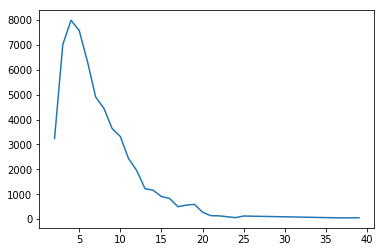

In [5]:
# train set
train_bboxCount_dict, train_batches=build_batches(trainset)
print('Number of batches:', len(train_batches))
print('train_batches size:', sum([len(item) for item in train_batches]))
print('trainset length:', len(trainset),'\n')

plt.plot(list(train_bboxCount_dict.keys()), list(train_bboxCount_dict.values()))
plt.show()

Number of batches: 297
test_batches size: 59400
testset length: 59507


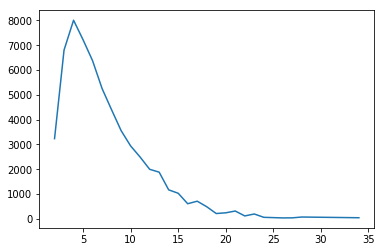

In [6]:
# test set

test_bboxCount_dict, test_batches=build_batches(testset)
print('Number of batches:', len(test_batches))
print('test_batches size:', sum([len(item) for item in test_batches]))
print('testset length:', len(testset))

plt.plot(list(test_bboxCount_dict.keys()), list(test_bboxCount_dict.values()))
plt.show()

In [8]:
# bboxes numbers in each train batch
[set([len(item[1:-1]) for item in train_batches[i]]) for i in range(len(train_batches))]

[{2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {3},
 {2, 3},
 {2, 3},
 {2, 3},
 {3},
 {3},
 {3},
 {2, 3},
 {2, 3},
 {2, 3},
 {2, 3},
 {3},
 {2, 3},
 {2, 3},
 {2, 3},
 {3},
 {2, 3},
 {3},
 {2, 3},
 {2, 3},
 {2, 3},
 {2, 3},
 {2, 3},
 {2, 3},
 {2, 3},
 {2, 3},
 {3},
 {2, 3},
 {3},
 {2, 3},
 {3},
 {3},
 {3},
 {2, 3},
 {2, 3},
 {4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {4},
 {3, 4},
 {3, 4},
 {3, 4},
 {2, 4},
 {4},
 {4},
 {4},
 {4},
 {3, 4},
 {4},
 {3, 4},
 {3, 4},
 {3, 4},
 {4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {4},
 {3, 4},
 {4},
 {3, 4},
 {3, 4},
 {4},
 {4},
 {3, 4},
 {4, 5},
 {4, 5},
 {4, 5},
 {5},
 {5},
 {5},
 {4, 5},
 {5},
 {4, 5},
 {4, 5},
 {4, 5},
 {4, 5},
 {4, 5},
 {5},
 {5},
 {5},
 {5},
 {5},
 {4, 5},
 {5},
 {5},
 {4, 5},
 {5},
 {4, 5},
 {5},
 {5},
 {5},
 {5},
 {4, 5},
 {5},
 {5},
 {4, 5},
 {4, 5},
 {5},
 {4, 5},
 {4, 5},
 {4, 5},
 {5},
 {6},
 {6},
 {5, 6}

In [9]:
# bboxes numbers in each test batch
[set([len(item[1:-1]) for item in train_batches[i]]) for i in range(len(test_batches))]

[{2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {2},
 {3},
 {2, 3},
 {2, 3},
 {2, 3},
 {3},
 {3},
 {3},
 {2, 3},
 {2, 3},
 {2, 3},
 {2, 3},
 {3},
 {2, 3},
 {2, 3},
 {2, 3},
 {3},
 {2, 3},
 {3},
 {2, 3},
 {2, 3},
 {2, 3},
 {2, 3},
 {2, 3},
 {2, 3},
 {2, 3},
 {2, 3},
 {3},
 {2, 3},
 {3},
 {2, 3},
 {3},
 {3},
 {3},
 {2, 3},
 {2, 3},
 {4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {4},
 {3, 4},
 {3, 4},
 {3, 4},
 {2, 4},
 {4},
 {4},
 {4},
 {4},
 {3, 4},
 {4},
 {3, 4},
 {3, 4},
 {3, 4},
 {4},
 {3, 4},
 {3, 4},
 {3, 4},
 {3, 4},
 {4},
 {3, 4},
 {4},
 {3, 4},
 {3, 4},
 {4},
 {4},
 {3, 4},
 {4, 5},
 {4, 5},
 {4, 5},
 {5},
 {5},
 {5},
 {4, 5},
 {5},
 {4, 5},
 {4, 5},
 {4, 5},
 {4, 5},
 {4, 5},
 {5},
 {5},
 {5},
 {5},
 {5},
 {4, 5},
 {5},
 {5},
 {4, 5},
 {5},
 {4, 5},
 {5},
 {5},
 {5},
 {5},
 {4, 5},
 {5},
 {5},
 {4, 5},
 {4, 5},
 {5},
 {4, 5},
 {4, 5},
 {4, 5},
 {5},
 {6},
 {6},
 {5, 6}

In [10]:
# Saving data on disk
np.save(open(trainset_save, 'wb'), train_batches)
np.save(open(testset_save, 'wb'), test_batches)